## TOC

### 1. Loading and Understanding the Data
### 2. Reading the Data in
### 3. Prepare Multiple Regression Model
### 4. Evaluate the model on training data
### 5.  using the model on test data
### 6. Some additional practice and play

In [40]:
# Import packages

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
from sklearn import linear_model

%matplotlib inline

In [10]:
# Use curl to download the data from IBM Object storage
# What does the -o flag do? Ans: It appears that the output of the curl is tabular whereas without the -o flag the output
# of curl is the original csv file

!curl https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv -o FuelConsumption.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 72629  100 72629    0     0   239k      0 --:--:-- --:--:-- --:--:--  238k


### Data Description

WE have downloaded a fuel consumption dataset, FuelConsumption.csv, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. Dataset source is: https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd6

MODELYEAR e.g. 2014
MAKE e.g. Acura
MODEL e.g. ILX
VEHICLE CLASS e.g. SUV
ENGINE SIZE e.g. 4.7
CYLINDERS e.g 6
TRANSMISSION e.g. A6
FUELTYPE e.g. z
FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9
FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9
FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2
CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0

In [5]:
# Read the data into a dataframe and look at the dataset and its size

df = pd.read_csv("FuelConsumption.csv")

df.shape, df.head()

((1067, 13),
    MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
 0       2014  ACURA         ILX      COMPACT         2.0          4   
 1       2014  ACURA         ILX      COMPACT         2.4          4   
 2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
 3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
 4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   
 
   TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
 0          AS5        Z                   9.9                  6.7   
 1           M6        Z                  11.2                  7.7   
 2          AV7        Z                   6.0                  5.8   
 3          AS6        Z                  12.7                  9.1   
 4          AS6        Z                  12.1                  8.7   
 
    FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
 0                   8.5                        33        

In [11]:
# Summarize the data

df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [12]:
# Select some features we want to use for regression and create another dataframe to hold these features

cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
type(cdf)

pandas.core.frame.DataFrame

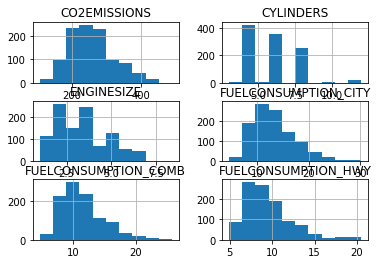

In [28]:
# Plot histograms various variables agains each other

viz = cdf[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
viz.hist()
plt.show()

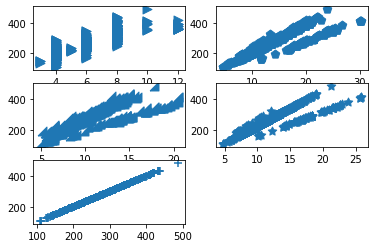

In [35]:
# Fixing random state for reproducibility
np.random.seed(19680801) # my not need it

# The definitions for x,y,z are for test use the cdf.xxxx for x and y axes
# x = np.random.rand(10)
# y = np.random.rand(10)
# z = np.sqrt(x**2 + y**2)

plt.subplot(321)
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, s=80, marker=">")

plt.subplot(322)
plt.scatter(cdf.FUELCONSUMPTION_CITY, cdf.CO2EMISSIONS, s=80, marker=(5, 0))

verts = np.array([[-1, -1], [1, -1], [1, 1], [-1, -1]])
plt.subplot(323)
plt.scatter(cdf.FUELCONSUMPTION_HWY, cdf.CO2EMISSIONS, s=80, marker=verts)

plt.subplot(324)
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, s=80, marker=(5, 1))

plt.subplot(325)
plt.scatter(cdf.CO2EMISSIONS, cdf.CO2EMISSIONS, s=80, marker='+')

# plt.subplot(326)
# plt.scatter(x, y, s=80, marker=(5, 2))

plt.show()

In [36]:
# Find the correlation of CO2EMISSIONS against each feature chosen for the model

cdf.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,0.892129
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,1.000000


In [37]:
# Create Train and Test datases

msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

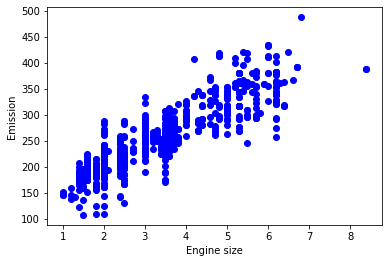

In [38]:
# Distribution of train dataset

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

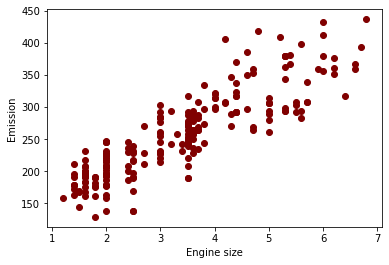

In [39]:
# Distribution of test dataset (hint: must be similar to the distribution of the train dataset)

plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS,  color='maroon')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [45]:
# Multiple Regression Model1: Uaing only ENGINESIZE and CYLINDERS
# Note: sklearn uses OLS to determine coefficient values

regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[11.30338031  7.82524768  9.01027689]]


In [50]:
# Multiple Regression Model2: Using all chosen features

regr2 = linear_model.LinearRegression()
x2 = np.asanyarray(train[['ENGINESIZE','CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']])
y2 = np.asanyarray(train[['CO2EMISSIONS']])
regr2.fit (x2, y2)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[11.30338031  7.82524768  9.01027689]]


Note on rdinary Least Squares (OLS):
OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ( y_hat ) over all samples in the dataset.

OLS can find the best parameters using of the following methods: - Solving the model parameters analytically using closed-form equations - Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)

In [49]:
# Prediction

y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 519.43
Variance score: 0.88


Note on Variance: explained variance regression score:
If y_hat is the estimated target output, y the corresponding (correct) target output, and Var is Variance, the square of the standard deviation, then the explained variance is estimated as follows:

E𝚡𝚙𝚕𝚊𝚒𝚗𝚎𝚍𝚅𝚊𝚛𝚒𝚊𝚗𝚌𝚎(𝑦,y_hat)=1−(𝑉𝑎𝑟|𝑦−y_hat|/𝑉𝑎𝑟|𝑦|)
The best possible score is 1.0, lower values are worse.

In [51]:
# Prediction using the model with all chosen features in it

y_hat2= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x2 = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y2 = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat2 - y2) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x2, y2))

Residual sum of squares: 519.43
Variance score: 0.88
